**To view as a slideshow:**
1. From the menu, select Cell -> Run All. Allow 30 seconds.
2. Select this cell. Click the "bar graph" icon above ("Enter/Exit Rise Slideshow"). Use the space bar to advance (shift+space to go back).

# SageMath Generating Functions
### SageDays Conference July 2019
### Author: Duncan Levear dlevear@gmail.com

## Part 1: From an explicit formula

## A calculus problem (OGFs)
_Find the first 8 terms of the power series expansion of $f(x) = \frac{1}{1-x-x^2}$ about $x=0$._

In [1]:
%display latex
S = (1/(1-x-x^2)).series(x,8)
S

1 + 1*x + 2*x^2 + 3*x^3 + 5*x^4 + 8*x^5 + 13*x^6 + 21*x^7 + Order(x^8)

In [2]:
print(S.coefficients())

[[1, 0], [1, 1], [2, 2], [3, 3], [5, 4], [8, 5], [13, 6], [21, 7]]


## A number theory problem (OGFs)
_McDonald's sells chicken nuggets in packs of 6, 9, and 20. What is the largest number that cannot be made out of these?_

In [3]:
%display latex
S=(1/(1-x^6-x^9-x^20)).series(x,100); S

1 + 1*x^6 + 1*x^9 + 1*x^12 + 2*x^15 + 2*x^18 + 1*x^20 + 3*x^21 + 4*x^24 + 2*x^26 + 5*x^27 + 2*x^29 + 7*x^30 + 3*x^32 + 9*x^33 + 6*x^35 + 12*x^36 + 7*x^38 + 16*x^39 + 1*x^40 + 12*x^41 + 21*x^42 + 17*x^44 + 28*x^45 + 3*x^46 + 24*x^47 + 37*x^48 + 3*x^49 + 36*x^50 + 49*x^51 + 6*x^52 + 50*x^53 + 65*x^54 + 12*x^55 + 72*x^56 + 86*x^57 + 16*x^58 + 102*x^59 + 115*x^60 + 30*x^61 + 143*x^62 + 151*x^63 + 45*x^64 + 202*x^65 + 204*x^66 + 70*x^67 + 282*x^68 + 269*x^69 + 111*x^70 + 394*x^71 + 361*x^72 + 165*x^73 + 549*x^74 + 485*x^75 + 253*x^76 + 762*x^77 + 646*x^78 + 378*x^79 + 1058*x^80 + 876*x^81 + 561*x^82 + 1462*x^83 + 1176*x^84 + 833*x^85 + 2024*x^86 + 1592*x^87 + 1221*x^88 + 2789*x^89 + 2163*x^90 + 1788*x^91 + 3847*x^92 + 2933*x^93 + 2603*x^94 + 5298*x^95 + 4008*x^96 + 3771*x^97 + 7282*x^98 + 5474*x^99 + Order(x^100)

In [4]:
N = [str(t[1]) for t in S.coefficients() if t[0]==0]
nonuggets = ', '.join(N)
print("You cannot make packs of " + nonuggets)

You cannot make packs of 1, 2, 3, 4, 5, 7, 8, 10, 11, 13, 14, 16, 17, 19, 22, 23, 25, 28, 31, 34, 37, 43


## A combinatorics problem (EGFs)
_What sequence has exponential generating function $f(x) = \sec x + \tan x$_?

In [5]:
f = sec(x) + tan(x)
f.series(x,12)

1 + 1*x + 1/2*x^2 + 1/3*x^3 + 5/24*x^4 + 2/15*x^5 + 61/720*x^6 + 17/315*x^7 + 277/8064*x^8 + 62/2835*x^9 + 50521/3628800*x^10 + 1382/155925*x^11 + Order(x^12)

In [6]:
C = f.series(x,14).coefficients()
seq = [t[0]*factorial(t[1]) for t in C]
print(seq)
#oeis(seq) requires internet configuration. Euler Numbers

[1, 1, 1, 2, 5, 16, 61, 272, 1385, 7936, 50521, 353792, 2702765, 22368256]


## Background: how does this work?
Any sage session automatically creates a "symbolic variable" `x`. This can be used to define functions and get their Taylor series (by taking derivatives). These calculations take place in the "symbolic ring".

In [7]:
f = sec(x) + tan(x)
type(f)

<type 'sage.symbolic.expression.Expression'>

In [8]:
type(x)

<type 'sage.symbolic.expression.Expression'>

In [9]:
type(parent(x))

<type 'sage.symbolic.ring.SymbolicRing'>

# Part 2: Solving symbolic equations
The symbolic ring SR was created in order to solve equations. You can use the symbolic variable `x`, and the `solve()` function.

In [10]:
solve(cos(x)==1/2,x)

[x == 1/3*pi]

In [11]:
solve(x^4 - 12*x^3 + 29*x^2 - 18*x,x)

[x == 1, x == 2, x == 9, x == 0]

### Multiple equations example
_Find the intersection of the curve $y=\frac{1}{3x^2+1}$ and the unit circle._

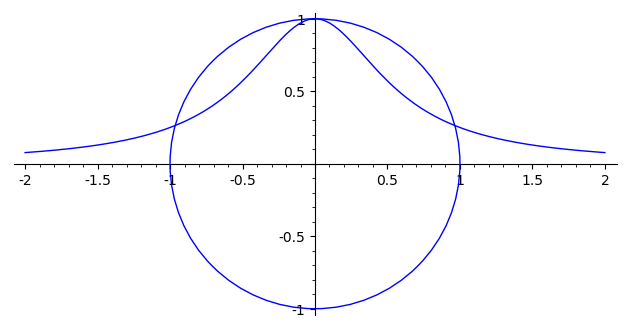

In [12]:
(1/(3*x^2+1)).plot((-2,2)) + circle((0,0),1)

In [13]:
y=var('y')
solve([x^2+y^2==1, y==1/(3*x^2+1)],[x,y])

[[x == -sqrt(1/6*sqrt(21) + 1/6), y == 1/6*sqrt(21) - 1/2], [x == sqrt(1/6*sqrt(21) + 1/6), y == 1/6*sqrt(21) - 1/2], [x == -sqrt(-1/6*sqrt(21) + 1/6), y == -1/6*sqrt(21) - 1/2], [x == sqrt(-1/6*sqrt(21) + 1/6), y == -1/6*sqrt(21) - 1/2], [x == 0, y == 1]]

# Part 3: Solving for a generating function

## Catalan Numbers
Let $F$ be the generating function for binary trees with $x$ tracking nodes. That is, $$F = \sum_{B \text{ binary trees}} x^{\# \text{nodes}(B)}$$ By standard Analytic Combinatorics, $F$ satisifes the equation $F = 1 + xF^2$. 

How do we find the coefficients of $F$? Simply make sage solve for the explicit expression:

In [14]:
F=var('F')
ans = solve(F == 1 + x*F^2,F); ans

[F == -1/2*(sqrt(-4*x + 1) - 1)/x, F == 1/2*(sqrt(-4*x + 1) + 1)/x]

In [15]:
F1 = ans[0].rhs(); F1

-1/2*(sqrt(-4*x + 1) - 1)/x

In [16]:
F1.series(x,10)

1 + 1*x + 2*x^2 + 5*x^3 + 14*x^4 + 42*x^5 + 132*x^6 + 429*x^7 + 1430*x^8 + 4862*x^9 + Order(x^10)

## Part 4: Multivariate generating functions
The `series()` method works even if there are other variables. 

### Example 1
Suppose we want to know the distribution of binary trees by the number of right-leaves. Define $$B(x,y) = \sum x^{\#\text{nodes}(B)}y^{\#\text{right_leaves}(B)}$$. It is easy to see that $B = 1 + x(B)(y) + x(B)(B-1)$. Now let sage do the work:

In [17]:
y=var('y')
B=var('B')
ans = solve(B==1+x*B*y+x*B*(B-1),B); ans

[B == -1/2*(x*y - x + sqrt(x^2*y^2 + x^2 - 2*(x^2 + x)*y - 2*x + 1) - 1)/x, B == -1/2*(x*y - x - sqrt(x^2*y^2 + x^2 - 2*(x^2 + x)*y - 2*x + 1) - 1)/x]

In [18]:
B1 = ans[0].rhs()
B1.series(x,7).expand()

1 + (y)*x + (y^2 + y)*x^2 + (y^3 + 3*y^2 + y)*x^3 + (y^4 + 6*y^3 + 6*y^2 + y)*x^4 + (y^5 + 10*y^4 + 20*y^3 + 10*y^2 + y)*x^5 + (y^6 + 15*y^5 + 50*y^4 + 50*y^3 + 15*y^2 + y)*x^6 + Order(x^7)

#### Remark
There are well-known formulas for Catalan and Narayana numbers that involve simple binomial coefficients. We can "blindly" derive the formulas using the binomial theorem to expand the square roots in the generating functions. Can we make sage do it?

### Example 2
From the McDonald's example, we see that there are 115 different ways to make 60 chicken nuggets. How many of those ways use $k$ packs?

In [19]:
(1/(1-y*x^6 - y*x^9 - y*x^20)).series(x,100).coefficients()[60][0].expand()

y^10 + 36*y^9 + 70*y^8 + 7*y^7 + y^3

## Part 5: No explicit formula?
What if we find a generating function whose functional equation cannot be solved explicitly? For example, the generating function $G$ for pentary trees satisfies $G = 1 + xG^5$ but there is no explicit formula. Is it still possible to obtain coefficients with sage?

### Approach 1: Polynomial approximation
$G$ is a fixed point of the map $\phi : \mathbb{Q}[[x]] \to \mathbb{Q}[[x]]$ defined by $\phi(P) = 1 + xP^5$. Starting from any power series $P$, we can iterate $\phi$ successively to approximate $G$. The simplest power series to start with is $P=1$.

In [20]:
P=1
for i in range(4):
    P = (1 + x*P^5)
P.expand()

x^156 + 125*x^155 + 7750*x^154 + 317750*x^153 + 9691375*x^152 + 234531275*x^151 + 4690625525*x^150 + 79740636500*x^149 + 1176174522625*x^148 + 15290273494625*x^147 + 177367296458300*x^146 + 1854297080433850*x^145 + 17615868320477675*x^144 + 153123241128335875*x^143 + 1224995038062368375*x^142 + 9065069248084265300*x^141 + 62323455559744870025*x^140 + 399613744737722182525*x^139 + 2397771938215228901550*x^138 + 13503947323417164355750*x^137 + 71576051007841282086275*x^136 + 357914842633747226129475*x^135 + 1692178126285721129346525*x^134 + 7579287530600361555305100*x^133 + 32218962933478840681300775*x^132 + 130200708806257806374533755*x^131 + 500947591466655650174256900*x^130 + 1837614866714581628055978050*x^129 + 6435161418963864699665018675*x^128 + 21538974774261081336554166775*x^127 + 68981380725424483126328752105*x^126 + 211605625092872091637587585105*x^125 + 622340551798928652593860625875*x^124 + 1756404367037341947509078177625*x^123 + 4760821006132894831851580791500*x^122 + 12403474919072827788922141267675*x^121 + 31083664756686723835416066278975*x^120 + 74981364659959538769228831694175*x^119 + 174218880865033275291174908727625*x^118 + 390149814766039254125204059847000*x^117 + 842600948563339797693704103775025*x^116 + 1755960245097607154097380536407825*x^115 + 3533022845352347148361962291394200*x^114 + 6866638198755333978252642473302900*x^113 + 12898103553844527049155950564068375*x^112 + 23426185725213916242896436847954925*x^111 + 41159896834637695646877035300471575*x^110 + 69990737656185016108072375800318050*x^109 + 115236880071703991420469061405619200*x^108 + 183786301082583434850126830869514300*x^107 + 284045079906654634858414451434877360*x^106 + 425590440624061925915920925545688600*x^105 + 618445704364851211359015141351291950*x^104 + 871943169836571894404147162414035200*x^103 + 1193221083548570879315443988270755100*x^102 + 1585502093628166060337935377007284145*x^101 + 2046401957543049180975875102504771645*x^100 + 2566590428017593437336790440435948425*x^99 + 3129142573508239944283942257680749400*x^98 + 3709858861330723378274702572397813800*x^97 + 4278694432971129141024781014577773085*x^96 + 4802242462547852818066226058766365595*x^95 + 5247003304124456283398798798813776485*x^94 + 5582990662143954737092918639289868375*x^93 + 5787125170300563382054738886064145250*x^92 + 5845874007310943433471477325759766300*x^91 + 5756715144348036398327525798203587650*x^90 + 5528210818552589480848244930047425025*x^89 + 5178719880591032624909123880254889050*x^88 + 4734007686090136789787118163352072750*x^87 + 4224176955947957360970725298907218050*x^86 + 3680414140584723664983872010449734575*x^85 + 3132018440011797556627570125370602175*x^84 + 2604072775016118423124356550741658325*x^83 + 2115960994002738769880519095687748300*x^82 + 1680771624609970389160121348557148860*x^81 + 1305488719270692420609346822938184025*x^80 + 991776258177207400581476464597860925*x^79 + 737121516463359377316310576938570425*x^78 + 536109636705366559125522776492102650*x^77 + 381642964211044041401862879763862255*x^76 + 265977900539882943947721070970506705*x^75 + 181513739099283029779078199939826150*x^74 + 121320878848907163156854783533183700*x^73 + 79433831741846296377555530731726025*x^72 + 50956146444980016121092609039446355*x^71 + 32031793118012895293383644241185235*x^70 + 19734556027976561203793168402758630*x^69 + 11917853531954775477475938347936425*x^68 + 7055889215147636159434248388290175*x^67 + 4095833258747470516981512159019210*x^66 + 2331410321064227796064983407605230*x^65 + 1301444332727252707536283982119955*x^64 + 712529476500516977338313710747985*x^63 + 382635995439646172007060647505125*x^62 + 201560527354695832381299783771775*x^61 + 104156977430526427191391472044100*x^60 + 52802772666194047483428258620400*x^59 + 26262051883076310337872598278600*x^58 + 12814988364569565618771381579775*x^57 + 6135297460754111457192701726230*x^56 + 2881956606085536645161087795100*x^55 + 1328240758315959645417792190200*x^54 + 600625451621012381438588610950*x^53 + 26648049482079

This method doesn't seem to work very well, but there are some ways you could optimize it. Is there a better way?

### Approach 2: Lagrange inversion
There happens to be a very efficient way to find the coefficients of $G$ if you know another FPS $\psi$ such that $\psi(G)=x$. Under these conditions $G$ is called the "reversion" of $\psi$, and can be computed in Sage with `psi.series(x).power_series(SR).reverse()`.

#### Example 1
You can often find $\psi$ from the functional equation. For quintic trees, $$G = 1 + x G^5$$ Now set $$G_1 := G-1$$ and then $$G_1 = x(G_1+1)^5$$ and $$\frac{G_1}{(G_1+1)^5} = x.$$

So in this case $$\psi(x) = \frac{x}{(x+1)^5}$$

In [21]:
psi=x/((x+1)^5)
psi.series(x).power_series(SR).reverse()

x + 5*x^2 + 35*x^3 + 285*x^4 + 2530*x^5 + 23751*x^6 + 231880*x^7 + 2330445*x^8 + 23950355*x^9 + 250543370*x^10 + 2658968130*x^11 + 28558343775*x^12 + 309831575760*x^13 + 3390416787880*x^14 + 37377257159280*x^15 + 414741863546285*x^16 + 4628362722856425*x^17 + 51912988256282175*x^18 + 584909606696793885*x^19 + O(x^20)

#### Explanation
The `reverse()` method is implemented in the ring `PowerSeriesRing(SR)`, which is not the same as the symbolic ring `SR`. The method `power_series(SR)` converts a symbolic series to the `PowerSeriesRing(SR)` ring, so then we can use the `reverse()` method. This could also be achieved with ``PowerSeriesRing(x,SR)(psi.series(x)).reverse()``.

This conversion opens up some other extra methods, too. But it also changes some things, like the `coefficients()` format. It would be nice if the two formats were more similar...

### Example 2 (multivariate)
The same method can be used for multivariate series, but it takes some setup.

Let's suppose our generating function $T(x,y)$ satisfies $T = x y (e^T-1) + x$ (this counts Cayley trees by leaves, but it doesn't really matter). In this case $\psi(x) = \frac{x}{y(e^x-1)+1}$.

If we follow the same procedure as above, our resulting power series will be totally crazy because in the symbolic ring `SR` none of the polynomials will simplify. Here is a small taste:

In [22]:
y=var('y')
psi=x/(y*(e^x-1)+1)
psi.series(x,7).power_series(SR).reverse() 

x + y*x^2 + (y^2 + 1/2*y)*x^3 + (3/8*(2*y^2 + y)*y + 1/4*(y^2 + y)*y + 7/8*y^2 + 1/6*y)*x^4 + (1/30*(9*(2*y^2 + y)*y + 6*(y^2 + y)*y + 21*y^2 + 4*y)*y + 1/10*(2*(y^2 + y)*y + 4*y^2 + y)*y + 4/15*(3*y^2 + y)*y + 3/20*(2*y^2 + y)*y + 1/10*(y^2 + y)*y + 5/12*y^2 + 1/24*y)*x^5 + (1/144*(4*(9*(2*y^2 + y)*y + 6*(y^2 + y)*y + 21*y^2 + 4*y)*y + 12*(2*(y^2 + y)*y + 4*y^2 + y)*y + 32*(3*y^2 + y)*y + 18*(2*y^2 + y)*y + 12*(y^2 + y)*y + 50*y^2 + 5*y)*y + 1/72*(6*(2*(y^2 + y)*y + 4*y^2 + y)*y + 4*(3*y^2 + y)*y + 9*(2*y^2 + y)*y + 6*(y^2 + y)*y + 17*y^2 + 2*y)*y + 1/72*(12*(3*y^2 + y)*y + 9*(2*y^2 + y)*y + 6*(y^2 + y)*y + 33*y^2 + 5*y)*y + 1/144*(8*(3*y^2 + y)*y + 12*(y^2 + y)*y + 22*y^2 + 3*y)*y + 1/72*(9*(2*y^2 + y)*y + 6*(y^2 + y)*y + 21*y^2 + 4*y)*y + 1/24*(2*(y^2 + y)*y + 4*y^2 + y)*y + 1/72*(7*y^2 + y)*y + 5/72*(4*y^2 + y)*y - 1/24*(4*y^2 - y)*y + 1/12*(3*y^2 + y)*y + 1/24*(2*y^2 + y)*y + 1/12*(2*y^2 - y)*y + 1/36*(y^2 + y)*y + 13/72*y^2 + 1/120*y)*x^6 + O(x^7)

So it would be nice if we could force sage to simplify along the way. 

This is done by switching the variable `y` to live in the `PolynomialRing` over the rationals. 

Unfortunately, the symbolic ring (where `x` lives) only works with other symbolic expressions, so we also need to change `x` to live in a `PowerSeriesRing` over the rationals. 

Finally, this will work:

In [23]:
P.<y> = PolynomialRing(QQ)
R.<x> = PowerSeriesRing(P,default_prec=10)
psi=x/(y*(e^x-1)+1)
T=psi.reverse()
T

x + y*x^2 + (y^2 + 1/2*y)*x^3 + (y^3 + 3/2*y^2 + 1/6*y)*x^4 + (y^4 + 3*y^3 + 7/6*y^2 + 1/24*y)*x^5 + (y^5 + 5*y^4 + 25/6*y^3 + 5/8*y^2 + 1/120*y)*x^6 + (y^6 + 15/2*y^5 + 65/6*y^4 + 15/4*y^3 + 31/120*y^2 + 1/720*y)*x^7 + (y^7 + 21/2*y^6 + 70/3*y^5 + 175/12*y^4 + 301/120*y^3 + 7/80*y^2 + 1/5040*y)*x^8 + (y^8 + 14*y^7 + 133/3*y^6 + 175/4*y^5 + 567/40*y^4 + 161/120*y^3 + 127/5040*y^2 + 1/40320*y)*x^9 + (y^9 + 18*y^8 + 77*y^7 + 441/4*y^6 + 2317/40*y^5 + 259/24*y^4 + 605/1008*y^3 + 17/2688*y^2 + 1/362880*y)*x^10 + O(x^11)

In [24]:
T.egf_to_ogf() #multiplies the coefficient of x^n by n!. Only available in PowerSeriesRing()

x + 2*y*x^2 + (6*y^2 + 3*y)*x^3 + (24*y^3 + 36*y^2 + 4*y)*x^4 + (120*y^4 + 360*y^3 + 140*y^2 + 5*y)*x^5 + (720*y^5 + 3600*y^4 + 3000*y^3 + 450*y^2 + 6*y)*x^6 + (5040*y^6 + 37800*y^5 + 54600*y^4 + 18900*y^3 + 1302*y^2 + 7*y)*x^7 + (40320*y^7 + 423360*y^6 + 940800*y^5 + 588000*y^4 + 101136*y^3 + 3528*y^2 + 8*y)*x^8 + (362880*y^8 + 5080320*y^7 + 16087680*y^6 + 15876000*y^5 + 5143824*y^4 + 486864*y^3 + 9144*y^2 + 9*y)*x^9 + (3628800*y^9 + 65318400*y^8 + 279417600*y^7 + 400075200*y^6 + 210198240*y^5 + 39160800*y^4 + 2178000*y^3 + 22950*y^2 + 10*y)*x^10

# Summary
- If you have an explicit formula: 
 - `f.series(x,10)`
- Elif you need to solve a simple equation $C = \phi(C,x)$:
 - `C = var('C')`
 - `ans = solve(C==phi(C,x),C)`
 - `C1 = ans[0].rhs()`
 - `C1.series(x,10)`
- Else (you need to solve a complicated functional equation):
 - Manipulate functional equation until you have $\psi(C) = x$
 - If one variable:
   - `psi.series(x).power_series().reverse()`
 - else (multivariable):
   - `P.<y> = PolynomialRing(QQ)`
   - `R.<x> = PowerSeriesRing(P)`
   - `psi=...`
   - `psi.reverse()`